A replication in R can be found here:
https://christophj.github.io/replicating/r/replicating-goyal-welch-2008/

In [71]:
import pandas as pd
import numpy as np
from pathlib import Path
import statsmodels.api as sm


In [72]:
# use notebook working directory; data is in the parent directory
notebook_dir = Path.cwd().parent
file_path_monthly = notebook_dir / "data" / "GW2024_Complete_Monthly.csv"
file_path_yearly = notebook_dir / "data" / "GW24_Complete_Annual.csv"
data_monthly = pd.read_csv(file_path_monthly)
data_annual = pd.read_csv(file_path_yearly)
data_monthly['yyyymm'] = pd.to_datetime(data_monthly['yyyymm'], format='%Y%m')
data_monthly.rename(columns={'yyyymm': 'date'}, inplace=True)
print(data_monthly.head())
print(data_monthly.shape)

        date  price   d12  e12  ret  retx  AAA  BAA  lty  ltr  ...  ygap  \
0 1871-01-01   4.44  0.26  0.4  NaN   NaN  NaN  NaN  NaN  NaN  ...   NaN   
1 1871-02-01   4.50  0.26  0.4  NaN   NaN  NaN  NaN  NaN  NaN  ...   NaN   
2 1871-03-01   4.61  0.26  0.4  NaN   NaN  NaN  NaN  NaN  NaN  ...   NaN   
3 1871-04-01   4.74  0.26  0.4  NaN   NaN  NaN  NaN  NaN  NaN  ...   NaN   
4 1871-05-01   4.86  0.26  0.4  NaN   NaN  NaN  NaN  NaN  NaN  ...   NaN   

   rdsp  rsvix  gpce  gip  tchi  house  avgcor  shtint  disag  
0   NaN    NaN   NaN  NaN   NaN    NaN     NaN     NaN    NaN  
1   NaN    NaN   NaN  NaN   NaN    NaN     NaN     NaN    NaN  
2   NaN    NaN   NaN  NaN   NaN    NaN     NaN     NaN    NaN  
3   NaN    NaN   NaN  NaN   NaN    NaN     NaN     NaN    NaN  
4   NaN    NaN   NaN  NaN   NaN    NaN     NaN     NaN    NaN  

[5 rows x 57 columns]
(1848, 57)


In [73]:
# show columns with only nan values
nan_columns = data_monthly.columns[data_monthly.isna().all()].tolist()
print("Columns with only NaN values:", nan_columns)
# delete these columns
data_monthly.drop(columns=nan_columns, inplace=True)
print("Shape after dropping NaN columns:", data_monthly.shape)

Columns with only NaN values: ['eqis', 'cay', 'i/k', 'pce', 'govik', 'skew', 'crdstd', 'accrul', 'cfacc', 'gpce', 'gip', 'house']
Shape after dropping NaN columns: (1848, 45)


In [74]:
data_monthly.describe()

,date,price,d12,e12,ret,retx,AAA,BAA,lty,ltr,...,fbm,dtoy,dtoat,ygap,rdsp,rsvix,tchi,avgcor,shtint,disag
count,1848,1848.000000,1848.000000,1848.000000,1188.000000,1188.000000,1272.000000,1272.000000,1272.000000,1188.000000,...,1182.000000,1188.000000,1188.000000,861.000000,1182.000000,332.000000,8.880000e+02,1186.000000,6.240000e+02,517.000000
mean,1947-12-16 15:31:56.883116928,417.394778,8.104819,19.302541,0.009627,0.006558,0.056364,0.068024,0.049082,0.004575,...,0.243091,0.920119,0.791234,-2.909605,0.039218,0.041891,-1.114865e-07,0.284313,-8.012821e-09,3.623891
min,1871-01-01 00:00:00,2.730000,0.180000,0.160000,-0.287461,-0.291524,0.021400,0.029400,0.006200,-0.112400,...,-1.363875,0.275924,0.112391,-4.868848,0.014326,0.008223,-2.681880e+00,0.034739,-2.236186e+00,2.255945
25%,1909-06-23 12:00:00,8.010000,0.425600,0.580000,-0.016829,-0.019196,0.036400,0.048300,0.028400,-0.007525,...,0.160684,0.893603,0.707003,-3.142419,0.024712,0.019380,-8.699770e-01,0.196972,-6.824493e-01,3.021161
50%,1947-12-16 12:00:00,18.770000,0.965000,1.626650,0.013161,0.009591,0.049200,0.061950,0.041700,0.003000,...,0.226123,0.956713,0.894181,-2.927001,0.030976,0.031140,8.188800e-01,0.267202,7.586200e-02,3.411661
75%,1986-06-08 12:00:00,236.815000,8.110825,15.237500,0.038927,0.035935,0.072625,0.083400,0.063550,0.015825,...,0.306147,0.987381,0.969171,-2.665644,0.042464,0.050972,1.055849e+00,0.348263,6.342877e-01,4.189495
max,2024-12-01 00:00:00,6032.380000,74.832300,210.170000,0.414312,0.412291,0.154900,0.171800,0.148200,0.152300,...,0.842323,1.000000,1.000000,-2.018659,0.420465,0.283216,1.055849e+00,0.707789,2.674143e+00,6.401161
std,NaN,919.392864,14.963458,38.540201,0.053881,0.053956,0.026483,0.028113,0.026835,0.024452,...,0.220396,0.103153,0.233620,0.400927,0.028576,0.036663,1.424530e+00,0.120318,1.000000e+00,0.730094


For a description of each of the variables, see data/GW2024_info.md

In [75]:
# plot every variable over time in a grid
# import matplotlib.pyplot as plt
# num_vars = data_monthly.shape[1] - 1  # exclude date column
# num_cols = 4
# num_rows = (num_vars + num_cols - 1) // num_cols
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))
# for i, column in enumerate(data_monthly.columns[1:]):  # exclude date column
#     ax = axes[i // num_cols, i % num_cols]
#     ax.plot(data_monthly['date'], data_monthly[column])
#     ax.set_title(column)
#     ax.set_xlabel('Date')
#     ax.set_ylabel(column)
# plt.tight_layout()
# plt.show()

The variable to be forecasted is: "log equity premiums using CRSP’s definition of the S&P 500 including
dividends net of the (Ken French posted) Treasury return in nonoverlapping
periods at their native frequencies" (GWZ24). In the data this should be Rfree (for riskfree return) and ret (return w/ dividends). A Rfree of 0.0049 means 0.49% return over a month with riskfree rate (annualized this would be > 5%).

In [76]:
data_monthly['log_equity_premium'] = data_monthly['ret'] - np.log(1 + data_monthly['Rfree'])

In [77]:
data_monthly["log_equity_premium"].describe()

count    1188.000000
mean        0.006941
std         0.053973
min        -0.287761
25%        -0.019784
50%         0.010203
75%         0.035949
max         0.413312
Name: log_equity_premium, dtype: float64

In [78]:
# annualize log equity premium
data_monthly["annualized_log_equity_premium"] = data_monthly["log_equity_premium"] * 12
data_monthly["annualized_log_equity_premium"].describe()

count    1188.000000
mean        0.083297
std         0.647676
min        -3.453131
25%        -0.237414
50%         0.122441
75%         0.431393
max         4.959750
Name: annualized_log_equity_premium, dtype: float64

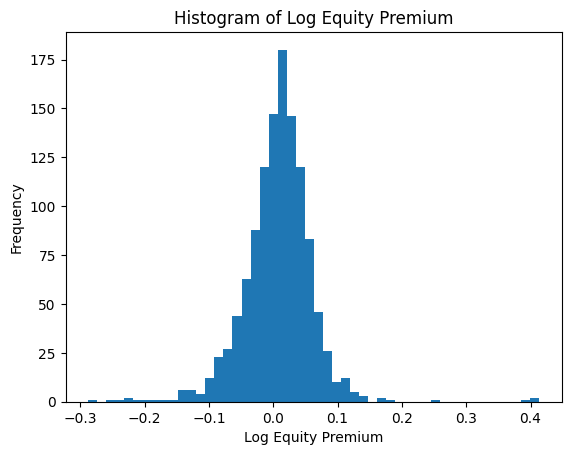

In [79]:
# plot histogram of excess returns
import matplotlib.pyplot as plt
plt.hist(data_monthly["log_equity_premium"].dropna(), bins=50)
plt.title("Histogram of Log Equity Premium")
plt.xlabel("Log Equity Premium")
plt.ylabel("Frequency")
plt.show()

In [80]:
# regression of vp on log_equity_premium
X = data_monthly[['vp']].dropna()
y = data_monthly['log_equity_premium'].loc[X.index]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     log_equity_premium   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     29.39
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.05e-07
Time:                        17:38:50   Log-Likelihood:                 686.09
No. Observations:                 384   AIC:                            -1368.
Df Residuals:                     382   BIC:                            -1360.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.003      6.386      0.0

In [81]:
data_annual

,yyyy,price,d12,e12,ret,retx,AAA,BAA,lty,ltr,...,ygap,rdsp,rsvix,gpce,gip,tchi,house,avgcor,shtint,disag
0,1871,4.74,0.26,0.40,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1872,5.07,0.30,0.43,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1873,4.42,0.33,0.46,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1874,4.54,0.33,0.46,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1875,4.37,0.30,0.36,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,2020,3756.07,58.28,94.13,0.193039,0.171269,0.0226,0.0316,0.0093,0.1666,...,-3.695709,0.039381,0.042189,0.013813,0.016937,1.055849,-0.247523,0.263884,-1.481539,6.401161
150,2021,4766.18,60.40,197.87,0.284753,0.266830,0.0265,0.0330,0.0147,-0.0543,...,-3.196435,0.039192,0.024679,0.008044,0.012417,1.055849,-0.232942,0.251053,-1.886112,4.601180
151,2022,3839.50,66.92,172.75,-0.181886,-0.195288,0.0443,0.0559,0.0362,-0.1246,...,-3.136812,0.030513,0.045050,0.001898,-0.004445,-1.332653,-0.230616,0.492762,-2.016237,2.884048
152,2023,4769.83,70.30,192.43,0.266388,0.245857,0.0474,0.0564,0.0402,0.0405,...,-3.249746,0.047711,NaN,0.006215,-0.004458,0.792587,-0.231972,0.239503,-2.094452,3.351642


In [ ]:
# annual excess return
annual_05 = data_annual.loc[data_annual['yyyy'] <= 2005].copy()
annual_05.loc[:, 'annual_log_equity_premium'] = np.log1p(annual_05['ret']) - np.log1p(annual_05['Rfree'])
annual_05['annual_log_equity_premium'].describe()

count    80.000000
mean      0.059409
std       0.196934
min      -0.617069
25%      -0.053176
50%       0.087990
75%       0.197363
max       0.423189
Name: annual_log_equity_premium, dtype: float64

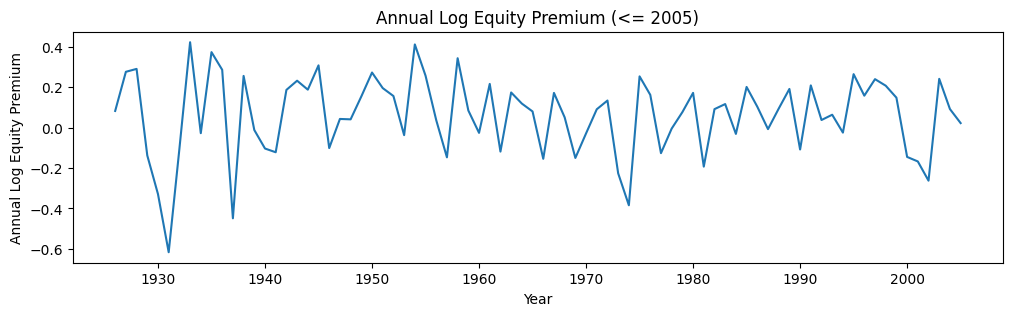

In [93]:
# plot premium over time
plt.figure(figsize=(12, 3))
plt.plot(annual_05['yyyy'], annual_05['annual_log_equity_premium'])
plt.title("Annual Log Equity Premium (<= 2005)")
plt.xlabel("Year")
plt.ylabel("Annual Log Equity Premium")
plt.show()

These equity premia are close to the ones from the paper 2008. They differ slightly because I use the updated data from 2024 and some of the values for Rfree and ret were updated (even the values for 1926 were updated, which seems a bit far back)

In [87]:
# excess returns for the full sample
annual = data_annual.copy()
annual.loc[:, 'annual_log_equity_premium'] = np.log1p(annual['ret']) - np.log1p(annual['Rfree'])
annual['annual_log_equity_premium'].describe()

count    99.000000
mean      0.064786
std       0.193641
min      -0.617069
25%      -0.029718
50%       0.094247
75%       0.193825
max       0.423189
Name: annual_log_equity_premium, dtype: float64

In [88]:
X = annual[['vp']].dropna()
y = annual['annual_log_equity_premium'].loc[X.index]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     annual_log_equity_premium   R-squared:                       0.409
Model:                                   OLS   Adj. R-squared:                  0.390
Method:                        Least Squares   F-statistic:                     20.80
Date:                       Tue, 28 Oct 2025   Prob (F-statistic):           8.03e-05
Time:                               17:49:35   Log-Likelihood:                 20.095
No. Observations:                         32   AIC:                            -36.19
Df Residuals:                             30   BIC:                            -33.26
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------